# PheWas and Data Manipulation

In [24]:
import pandas as pd
import numpy as np
from phemap import Phemap
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats
import seaborn as sns
import math
from tabulate import tabulate

In [2]:
source_file = 'data/phecode_definitions1.2.csv'
mapping_file = 'data/phecode_map.csv'

In [3]:
phemap = Phemap(source_file=source_file, mapping_file=mapping_file)

Read patients hw

In [2]:
df = pd.read_csv("../../imputed-v2-gwas/hwpheno.tsv", sep='\t',index_col=0)

Field IDField title <br>

41270 Diagnoses - ICD10 <br>


In [3]:
df = pd.read_csv("../../main_df/ukb47615.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (354,2831,2925,2927,2928,2929,2930,2931,2932,2933,2934,2935,2936,2937,2938,2939,2940,2941,2942,2943,2944,2945,2946,2947,2948,2949,2950,2957,2958,2959,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2986,2988,2989,3010,3080,3082,3083,3084,3085,3086,3087,3088,3089,3090,3091,3092,3093,3094,3095,3096,3097,3099,3100,3113,3114,3115,3116,3117,3118,3119,3120,3121,3122,3123,3124,3125,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135,3136,3137,3138,3139,3140,3141,3142,3143,3144,3145,3146,3147,3148,3149,3150,3151,3152,3153,3154,3156,3157,3158,3159,3160,3161,3162,3163,3164,3165,3166,3167,3168,3169,3170,3171,3172,3173,3174,3175,3176,3190,3191,3192,3193,3194,3195,3196,3197,3198,3199,3200,3201,3202,3203,3204,3205,3206,3207,3208,3209,3210,3211,3212,3213,3214,3215,3216,3217,3218,3219,3220,3221,3222,3223,3224,3225,3226,3227,3228,3

I'll take just field Diagnoses - ICD10 [41270-0.0 to 41270-0.222]<br>
Then I'll take is_white British 21000-0.0' main needs to be 1, 1001, 1002 <br>
Then height is <br>
Then weight is <br>
Then age is <br>
Then sex is 31-0.0 main dataset  0 - female, 1 - male<br>
Then BMI is <br>

In [98]:
icd9_codes = {}

In [99]:
icd9_codes = {'eid': (np.array(df['eid']))}

In [100]:
for i in range(0,223):
    icd9_codes[f'ICD10_{i+1}']= np.array(df[f'41270-0.{i}'])

In [101]:
np.array(df['eid'])

array([1000012, 1000029, 1000031, ..., 6024887, 6024893, 6024902],
      dtype=int64)

In [105]:
df_icd9=pd.DataFrame(icd9_codes)

In [ ]:
df_icd9.to_csv("icd9.csv")

## Mapping ICD9 to PheCodes

In [5]:
df_icd9=pd.read_csv("icd9.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
source_file = 'data/phecode_definitions1.2.csv'
mapping_file = 'data/phecode_map.csv'

In [3]:
phemap = Phemap(source_file=source_file, mapping_file=mapping_file)

In [5]:
df_icd9

,Unnamed: 0,eid,ICD10_1,ICD10_2,ICD10_3,ICD10_4,ICD10_5,ICD10_6,ICD10_7,ICD10_8,...,ICD10_214,ICD10_215,ICD10_216,ICD10_217,ICD10_218,ICD10_219,ICD10_220,ICD10_221,ICD10_222,ICD10_223
0,0,1000012,C504,C780,C782,D509,E785,J450,J459,K20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1000029,E780,I10,I210,I251,J342,J383,K402,R040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1000031,I849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1000047,H269,K429,R074,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1000050,D649,M069,M0695,M1394,M169,M2381,R073,R074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502456,502456,6024860,C500,N63,R55,Z860,Z923,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502457,502457,6024874,G560,I730,I839,K228,K259,K296,K318,K319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502458,502458,6024887,A099,I848,K635,N801,N803,R073,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502459,502459,6024893,E561,I10,K573,M171,M201,M7747,N950,Z530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For each patient, loop through all codes and add to the list all PheCodes

In [6]:
patient_diag = {}

In [7]:
for index, row in tqdm(df_icd9.iterrows()):
    pheno_codes = []
    for i in range(1,224):
        icd10 = row[f'ICD10_{i}']
        try:
            phecode = phemap.get_phecode_for_icd10(icd10)
            pheno_codes +=phecode
        except:
            1+2
    patient_diag[row['eid']] = pheno_codes

502461it [15:34:45,  8.96it/s]


In [18]:
len(patient_diag)

502461

In [45]:
filehandler = open("patient_diag", 'wb')
pickle.dump(patient_diag, filehandler)

# PheWas

Read non-imaging phenotypes

In [4]:
with open(r"patient_diag_filter", "rb") as input_file:
    non_imaging = pickle.load(input_file)

Read imaging phenotypes

In [26]:
imaging= pd.read_csv("../../imputed-v2-gwas/hwpheno.tsv", sep='\t',index_col=0)

In [35]:
cnt=0
for idx in imaging['idx']:
    if(not(idx in non_imaging)):
        imaging=imaging.drop(cnt)
    cnt+=1

In [39]:
len(imaging)

31716

In [40]:
len(non_imaging)

31716

In [41]:
all_codes=phemap.get_all_phecodes()

In [42]:
all_phe_codes=[]

In [43]:
for i in range(len(all_codes)):
    all_phe_codes.append(all_codes[i]['phecode'])

In [44]:
PheWasDic = {}
PheWasDic['idx'] = np.array(imaging['idx'])
PheWasDic['hw'] = np.array(imaging['hw'])

In [45]:
for phecode in all_phe_codes:
    diagnosed = []
    for patient in non_imaging:
        if (phecode in non_imaging[patient]):
            diagnosed.append(1)
        else:
            diagnosed.append(0)  
    PheWasDic[phecode] = np.array(diagnosed)

In [46]:
PheWasDic

{'idx': array([1000012, 1000158, 1000262, ..., 6024624, 6024638, 6024797],
       dtype=int64),
 'hw': array([1.80281489, 1.99812746, 1.60394971, ..., 1.94664545, 1.35807633,
        1.70590854]),
 '008': array([0, 0, 0, ..., 0, 0, 0]),
 '008.5': array([0, 0, 0, ..., 0, 0, 0]),
 '008.51': array([0, 0, 0, ..., 0, 0, 0]),
 '008.52': array([0, 0, 0, ..., 0, 0, 0]),
 '008.6': array([0, 0, 0, ..., 0, 0, 0]),
 '008.7': array([0, 0, 0, ..., 0, 0, 0]),
 '010': array([0, 0, 0, ..., 0, 0, 0]),
 '031': array([0, 0, 0, ..., 0, 0, 0]),
 '031.1': array([0, 0, 0, ..., 0, 0, 0]),
 '038': array([0, 0, 0, ..., 0, 0, 0]),
 '038.1': array([0, 0, 0, ..., 0, 0, 0]),
 '038.2': array([0, 0, 0, ..., 0, 0, 0]),
 '038.3': array([0, 0, 0, ..., 0, 0, 0]),
 '041': array([0, 0, 0, ..., 0, 0, 0]),
 '041.1': array([0, 0, 0, ..., 0, 0, 0]),
 '041.11': array([0, 0, 0, ..., 0, 0, 0]),
 '041.12': array([0, 0, 0, ..., 0, 0, 0]),
 '041.2': array([0, 0, 0, ..., 0, 0, 0]),
 '041.21': array([0, 0, 0, ..., 0, 0, 0]),
 '041.4': 

In [50]:
dfp =pd.DataFrame.from_dict(PheWasDic)

In [51]:
dfp.to_csv("phewas.csv")

Table structure:
eid___hw___phenocode1___phenocode2.....
eid, float,

## Perform PheWas

In [58]:
phe_table = pd.read_csv("phewas.csv")

In [59]:
phe_table

,Unnamed: 0,idx,hw,008,008.5,008.51,008.52,008.6,008.7,010,...,986,987,988,989,990,994,994.1,994.2,994.21,996
0,0,1000012,1.802815,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1000158,1.998127,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1000262,1.603950,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1000369,1.655384,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1000489,1.803001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31711,31711,6024290,1.907692,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31712,31712,6024323,1.835910,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31713,31713,6024624,1.946645,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31714,31714,6024638,1.358076,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# PERFORM THE ASSOCIATION

In [75]:
results = {}

In [76]:
results['phecode'] = np.array(phe_table.columns[3:])

In [78]:
ccs = []
p_vals = []
for phecode in phe_table.columns[3:]:
    cc, p_val = scipy.stats.pearsonr(phe_table['hw'], phe_table[phecode])
    ccs.append(cc)
    p_vals.append(p_val)
    
results['ccs']=ccs
results['p_vals']=p_vals

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [81]:
results = pd.DataFrame.from_dict(results)

Drop Nans

In [ ]:
results = results.dropna()

In [93]:
results

,phecode,ccs,p_vals
64,110.1,0.000153,0.978222
65,110.11,0.000771,0.890797
66,110.12,-0.004406,0.432693
67,110.13,0.000305,0.956660
71,112.3,-0.003825,0.495726
...,...,...,...
1832,964.1,-0.008151,0.146607
1834,965.1,-0.011054,0.049003
1836,965.3,-0.003403,0.544448
1843,972.2,-0.004787,0.393933


In [104]:
log_corr_p = - np.log10(results['p_vals'])

In [105]:
log_corr_p

0      0.009563
1      0.050221
2      0.363820
3      0.019242
4      0.304758
         ...   
955    0.833845
956    1.309776
957    0.264043
958    0.404578
959    1.738609
Name: p_vals, Length: 960, dtype: float64

In [106]:
results['log_cor']=log_corr_p

In [146]:
results.to_csv("hw_phewas_results.csv",index=False)

# ANalyize and Plot


Bonferroni correction

In [4]:
results=pd.read_csv("hw_phewas_results.csv")

In [5]:
p_bonf = 0.05 / len(phemap.get_all_phecodes())

In [6]:
p_bonf

2.679528403001072e-05

In [7]:
print('Number of correlations reaching Bonferroni threshold = {0}'.format(np.sum(results['p_vals'] < p_bonf)))

Number of correlations reaching Bonferroni threshold = 23


In [8]:
relevant = np.array(results[results['p_vals']<p_bonf])

In [9]:
relevant

array([[244.4, -0.03311483184301189, 3.6615215689408868e-09,
        8.436338403219219, 'endocrine/metabolic'],
       [257.1, 0.023796553217081632, 2.2516048508832445e-05,
        4.6475078243618295, 'endocrine/metabolic'],
       [272.11, -0.041357249616125705, 1.7298746063444688e-13,
        12.761985376493378, 'endocrine/metabolic'],
       [278.1, -0.0400971123961062, 9.099681888908545e-13,
        12.040973789690607, 'endocrine/metabolic'],
       [362.2, -0.023674747034025626, 2.479503726818447e-05,
        4.6056352346059946, 'sense organs'],
       [362.29, -0.023674747034025626, 2.479503726818447e-05,
        4.6056352346059946, 'sense organs'],
       [366.2, -0.04226358647744174, 5.082434093211019e-14,
        13.293928244394865, 'sense organs'],
       [394.2, -0.03841431540107152, 7.73048835962336e-12,
        11.111793069446463, 'circulatory system'],
       [395.1, -0.03749553272282631, 2.394973917812367e-11,
        10.620699211857703, 'circulatory system'],
       [40

In [26]:
table = []
table.append(["PheCode", "CorCoef", "P_VAL"])
for p in relevant:
    table.append([phemap.get_phecode_info(p[0])['phenotype'], p[1] ,p[2]])

PRINTING A REPORT FOR RELEVANT PHENOTYPES


In [28]:
print(tabulate(table))

---------------------------------------------------  ---------------------  ----------------------
PheCode                                              CorCoef                P_VAL
Hypothyroidism NOS                                   -0.03311483184301189   3.6615215689408868e-09
Testicular hypofunction                              0.023796553217081632   2.2516048508832445e-05
Hypercholesterolemia                                 -0.041357249616125705  1.7298746063444688e-13
Obesity                                              -0.0400971123961062    9.099681888908545e-13
Degeneration of macula and posterior pole of retina  -0.023674747034025626  2.479503726818447e-05
Macular degeneration (senile) of retina NOS          -0.023674747034025626  2.479503726818447e-05
Senile cataract                                      -0.04226358647744174   5.082434093211019e-14
Mitral valve disease                                 -0.03841431540107152   7.73048835962336e-12
Nonrheumatic mitral valve disorde

In [11]:
categories = []
for i in range(len(results)):
    categories.append(phemap.get_phecode_info(results['phecode'][i])['category'])

In [12]:
results['categories']=categories
results.to_csv("hw_phewas_results.csv",index=False)

In [13]:
len(np.unique(results['categories']))

17

In [14]:
pal = ['green', 'blue', 
       'purple', 'orange', 
       'pink', 'blue',
      'blue','red',
      'brown', 'green',
      'black', 'yellow',
      'purple', 'gray',
       'gold','blue','green']


In [15]:
len(pal)

17

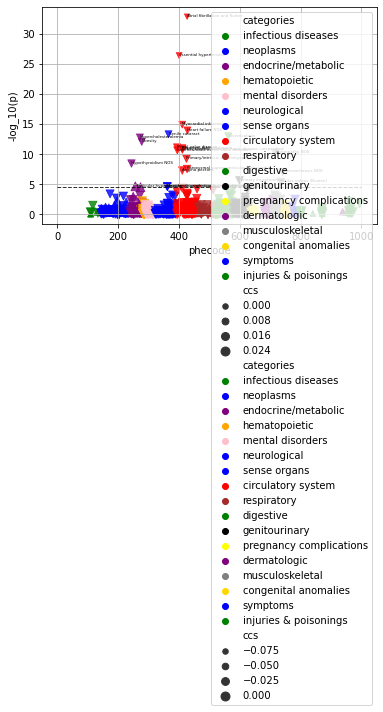

In [22]:
markers=["^","v"]
positive_cor = results[results['ccs']>0]
negative_cor = results[results['ccs']<0]
significant = results[results['p_vals']<p_bonf]
sns.scatterplot(x=positive_cor['phecode'], y=positive_cor['log_cor'], size=positive_cor['ccs'],
                     hue=positive_cor['categories'],sizes=(30, 80), 
                     alpha=0.8, palette=pal, marker="^", ec="face")
sns.scatterplot(x=negative_cor['phecode'], y=negative_cor['log_cor'], size=negative_cor['ccs'], hue=negative_cor['categories'],
                     sizes=(30, 80), 
                     alpha=0.8, palette=pal, marker="v", ec="face")

plt.plot([0, 1000], [-math.log10(p_bonf), -math.log10(p_bonf)], 'k--', linewidth=1, alpha=0.8)
for index, sig in significant.iterrows():
    plt.text(x= sig['phecode'],
             y= sig['log_cor'],
             s = phemap.get_phecode_info(sig['phecode'])['phenotype'],
             fontdict=dict(color='black',size=4)) 
plt.ylabel('-log_10(p)')
#plt.legend([])
plt.grid()
plt.savefig("foo.png",dpi=200)

In [17]:
np.unique(results['categories'])

array(['circulatory system', 'congenital anomalies', 'dermatologic',
       'digestive', 'endocrine/metabolic', 'genitourinary',
       'hematopoietic', 'infectious diseases', 'injuries & poisonings',
       'mental disorders', 'musculoskeletal', 'neoplasms', 'neurological',
       'pregnancy complications', 'respiratory', 'sense organs',
       'symptoms'], dtype=object)

TODO THINGS:
For plot:
* Create intervals
* Color hue distinct
* write names next
* make triangles
* see what are associated

Make it look like in the picture